**Spec:**

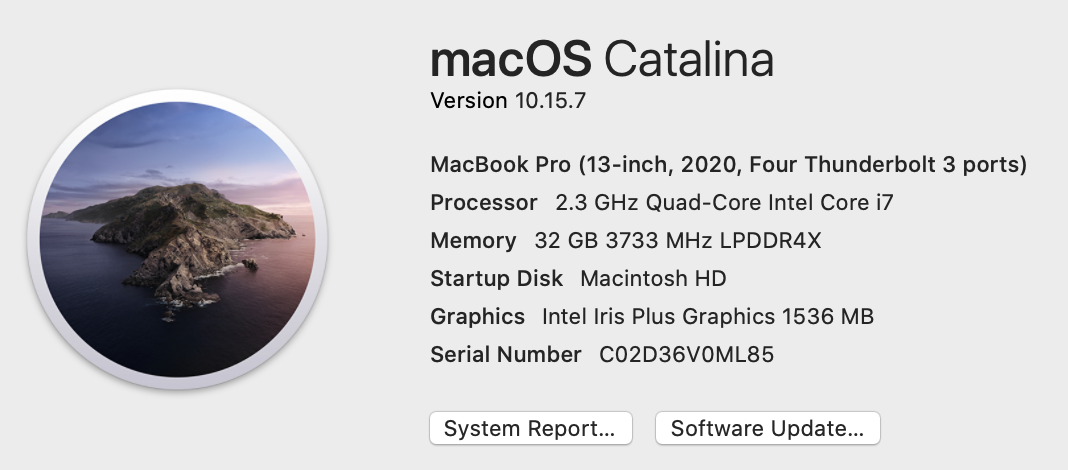
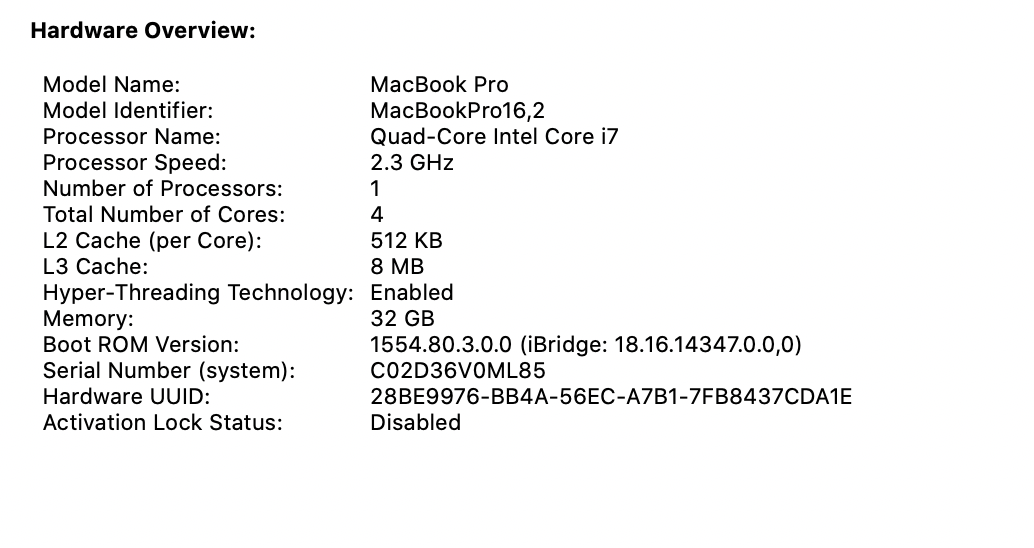
* Spec of system: 
   * Model: MacBook Pro 13 Inch
   * Number of CPUs: 1 Quad-Core 2.3GHZ Intel Core i7 CPU
   * Number of Core per CPU: 4 cores
   * Clock Rate: 2.3GHZ
   * Cache Memory: 512 KB L2 Cache (per Core); 8MB L3 Cache
   * Main Memory: 32 GB 3733 MHz LPDDR4X

* Cluster: N/A
* Operating System: Mac OS Catalina Version 10.15.7
* Compiler: Python 2.7.16 (default, Jun  5 2020, 22:59:21) 
* Libraries: `multiprocessing`, `time` imported by Python script
* Others: N/A

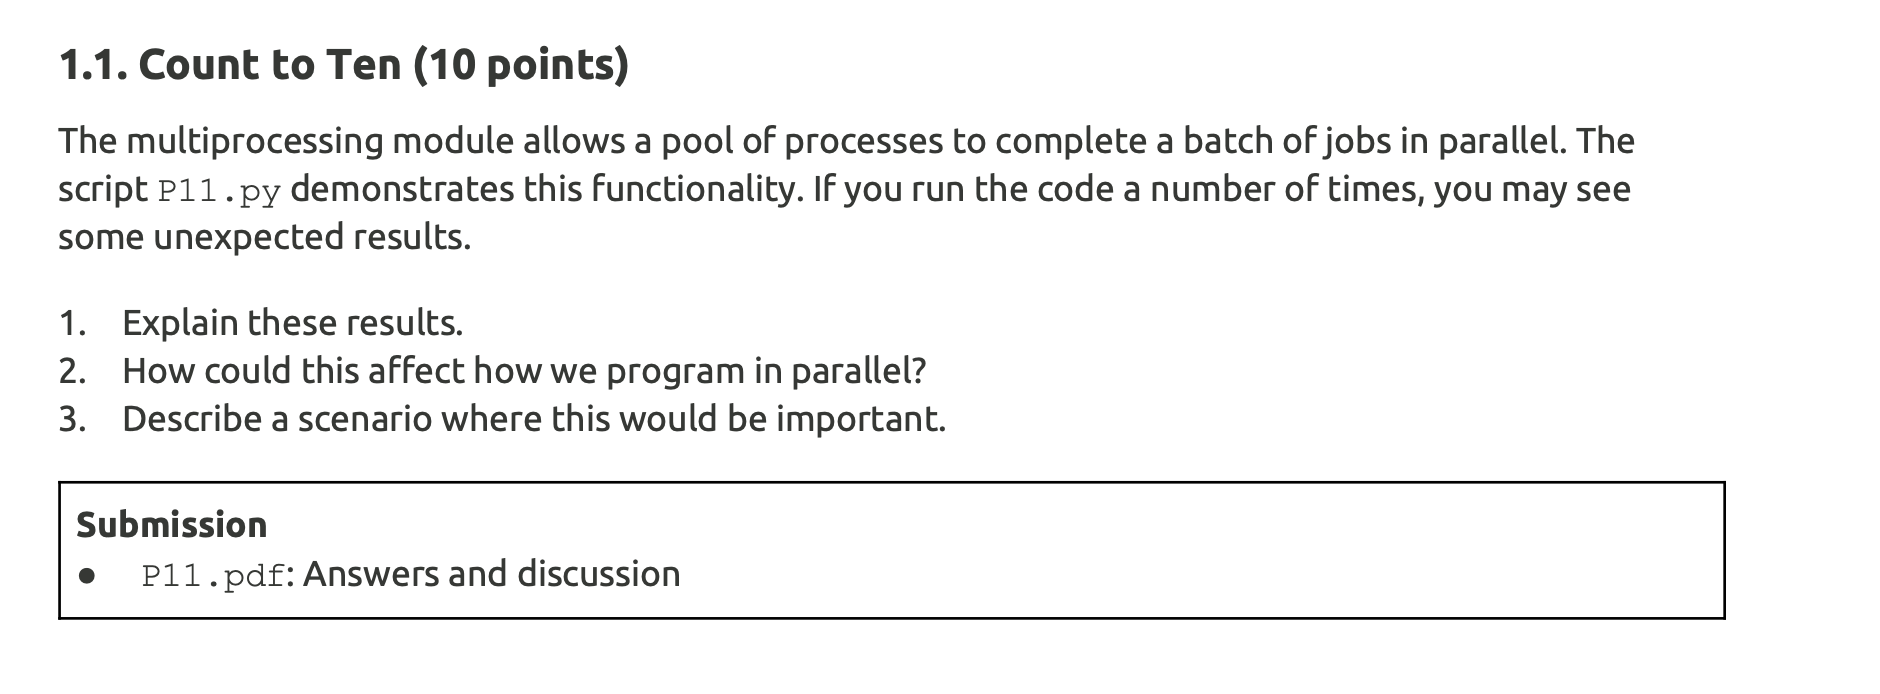

> By Jiahui Tang

**Q1.**

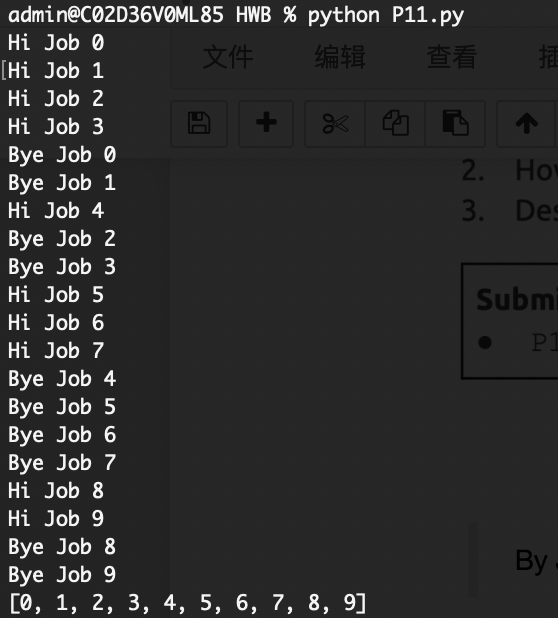
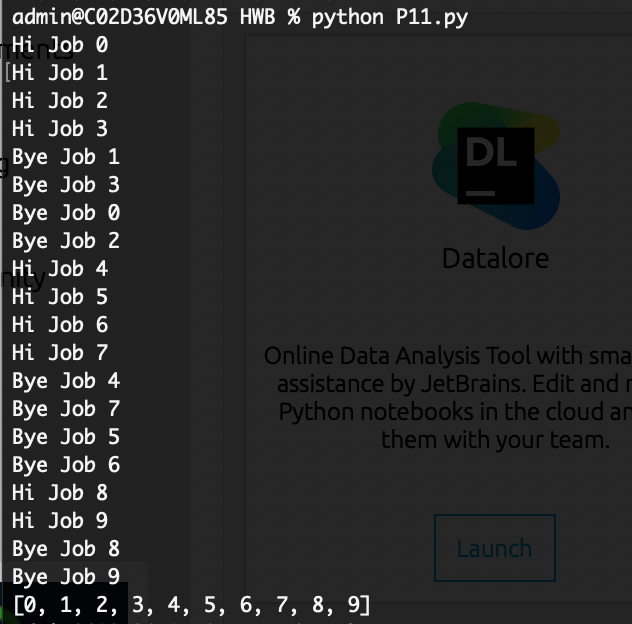
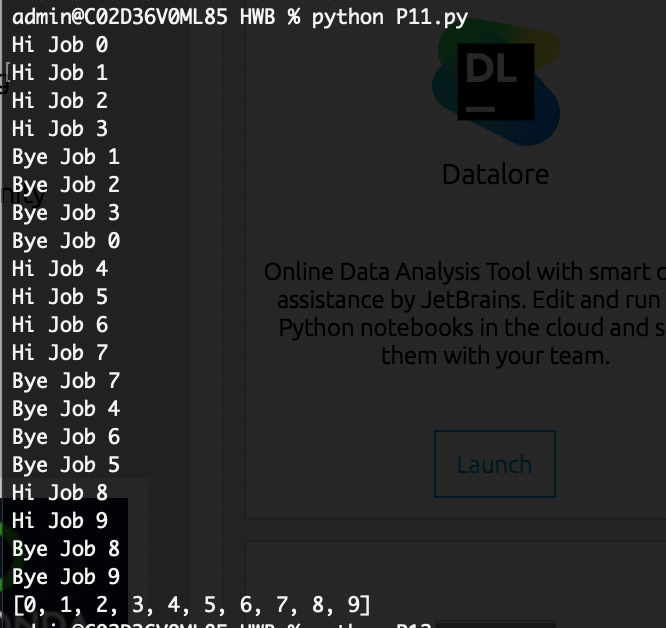


A snippet of result shows that job from 0 to 9 are starting in sequence one by one with a pool of 4 process at maximal, however they may end in different sequence. As this example shows a multi-process in Python, each process are parallel and they could be run together. And the program uses pool.map to apply burnTime to this list of "job numbers" from 0 to 10. Thus, if we look at the `Hi Job`, we can see that the list of jobs started one by one following the sequence from 0 to 9, with maximum 4 jobs running in parallel. However, some jobs ends earlier while some other jobs ends later in a random sequence. Sometimes new jobs starts before the previous round of all 4 jobs ends. Thus we could observe the `Bye Job` is printed out in random sequence in between `Hi Job`. But each `Bye Job` always comes after `Hi Job` started for the same number, with maximum 4 job running at the same time.  

**Q2.** This shows when multiprocessing module runs a pool of processes to complete a batch of jobs in parallel, they are not running in sequence or deterministic order. 

As each task could be broken down into smaller part and tasks, it could affect our program in parallel, because when we need our process to be parallelly executed, the sequence of different thread/process is indetermined, the smallest chunk of tasks should not require a specific order or have any dependency over each other. A dependence exists between program statement when the order of statement execution affect the results of the program. It could result from multiple use of the same location in storage by different tasks, and is the one of the main inhibitor to parallelism. 

If jobs still have dependency on each other and needs previous information to pass on next one, we should not break them and run them in parallel. 

**Q3.** Under race condition or shared variable computation, this is particularly important. A race condition occurs when two or more processes manipulate a shared resources concurrently and the outcome of the execution depends on a particular order in which access take the place. For example, if one compute on a shared variable, to increase `sum = sum + 1` for multiple times, synchronization is needed to prevent race condition in parallelism. A lock should be added that could do mutual exclusion, and prevent simultaneous access to a shared resources, so that the indeterministic sequence in parallel computing as we observed in questions above won't cause trouble and lead to unexpected result under race condition. Another example could be shared variable computation such as `sum = sum*2+1`, it requires dependency and sequence in multiplication and addition operators. We can't break them into two tasks such as `sum = sum * 2` and `sum = sum + 1`, because their order would be indetermined after running on parallel jobs and leads to different answers.